### A Book Recommendation System which recommends the users a selection of books based on their interests.

###  import Necessary Libraries

In [116]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


### import data

In [117]:
books=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Documents\\Books.csv",encoding='latin-1')#unicode error
users=pd.read_csv("C:\\Users\\DELL\\Downloads\\Users.csv",encoding='latin-1')
ratings=pd.read_csv("C:\\Users\DELL\\Downloads\\Ratings.csv",encoding='latin-1')

### Data understanding

In [118]:
books.head(2)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [119]:
users.head(2)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [120]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0


In [121]:
print("BOOKS_DATA:",books.shape)
print("USERS_DATA:",users.shape)
print("RATINGS_DATA:",ratings.shape)

BOOKS_DATA: (271360, 8)
USERS_DATA: (278858, 3)
RATINGS_DATA: (1149780, 3)


In [122]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [123]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [124]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149772 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


In [125]:
books.isna().sum()#used to detect missing values and to count the no of NANS

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [126]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [127]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

###  DATA CLEANING  & DATA EXPLORATION

#### 1.BOOKS_DATA

### We will drop the columns that primarily don't seem important for the book recommendation.

In [128]:
 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [129]:
#books= books.drop('Image-URL-S', axis=1)
#books= books.drop('Image-URL-M', axis=1)
#books= books.drop('Image-URL-L', axis=1)
#books.head()

In [130]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [131]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [132]:
# Renamimng the columns

dict={'Book-Title':'title','Book-Author':'bookauthor','Year-Of-Publication':'yearofpublication','Publisher':'publisher'}
books.rename(columns=dict,inplace=True)

In [133]:
books.dropna(inplace=True)

In [134]:
books['yearofpublication'].shape

(271354,)

In [135]:
books['yearofpublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [136]:
# fxing the error's year of publication column


books.loc[(books['yearofpublication']=='DK Publishing Inc') | (books['yearofpublication']=='Gallimard')]



,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [137]:
#dropping the rows with errors as they are very few in number
books.drop(books[books['yearofpublication']=='DK Publishing Inc'].index,inplace=True)
books.drop(books[books['yearofpublication']=='Gallimard'].index,inplace=True)
books

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


There are some incorrect entries in yearOfPublication. It looks like publisher names ‘DK Publishing Inc’ and ‘Gallimard’ have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file. Also, some of the values are strings and same years have been entered as numbers at some places. We will make necessary correction for these rows and set the data type for yearOfPublication as int.

In [138]:
#changing the publication year to int type before feeding it to the models
books['yearofpublication'] = books['yearofpublication'].astype('int')
books

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [139]:
print(sorted(books['yearofpublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


### we are having some publications years as 0 ideally we were not supposed to have  years like these. we are not going to drop here as we may loose some valid information. so, replace these years by mean of same column

In [140]:
#replacing the yearofpublication with 0 input with nan values

books.loc[(books['yearofpublication']==0)]=np.nan
#replacing the nan values in the publication year with mean of the same column

books['yearofpublication'].fillna((books['yearofpublication'].mean()), inplace=True)



In [141]:
#converting to integer type
books['yearofpublication'] = books['yearofpublication'].astype('int') 

In [142]:
books['yearofpublication'].value_counts()[0:10]

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: yearofpublication, dtype: int64

In [143]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               266736 non-null  object
 1   title              266736 non-null  object
 2   bookauthor         266736 non-null  object
 3   yearofpublication  271354 non-null  int32 
 4   publisher          266736 non-null  object
 5   Image-URL-S        266736 non-null  object
 6   Image-URL-M        266736 non-null  object
 7   Image-URL-L        266736 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.6+ MB


In [144]:
books.head(4)

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [145]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

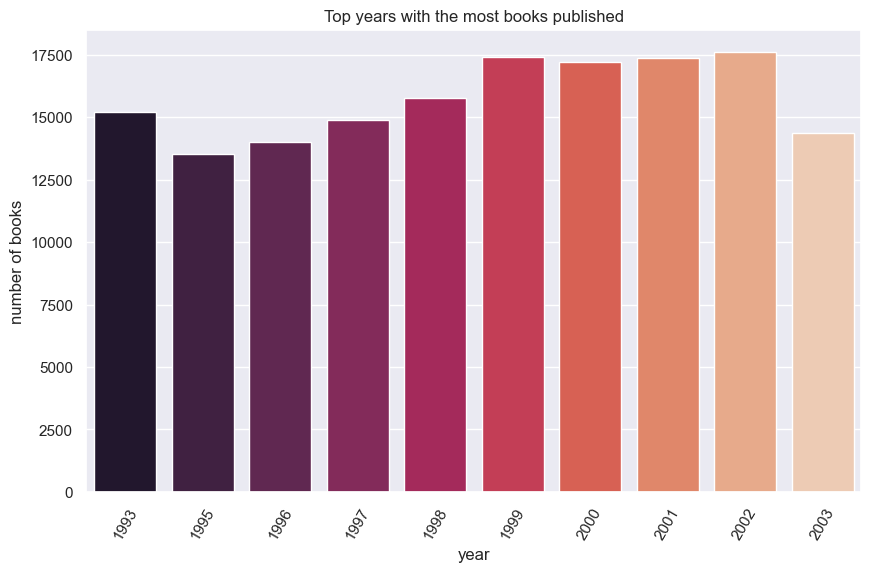

In [146]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['yearofpublication'].value_counts()[:10].index,y = books['yearofpublication'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

### Year 2000 has seen the most number of books being published around 17500 books. The ten year period stretching from 1993 to 2003 has seen a good number of book publications.

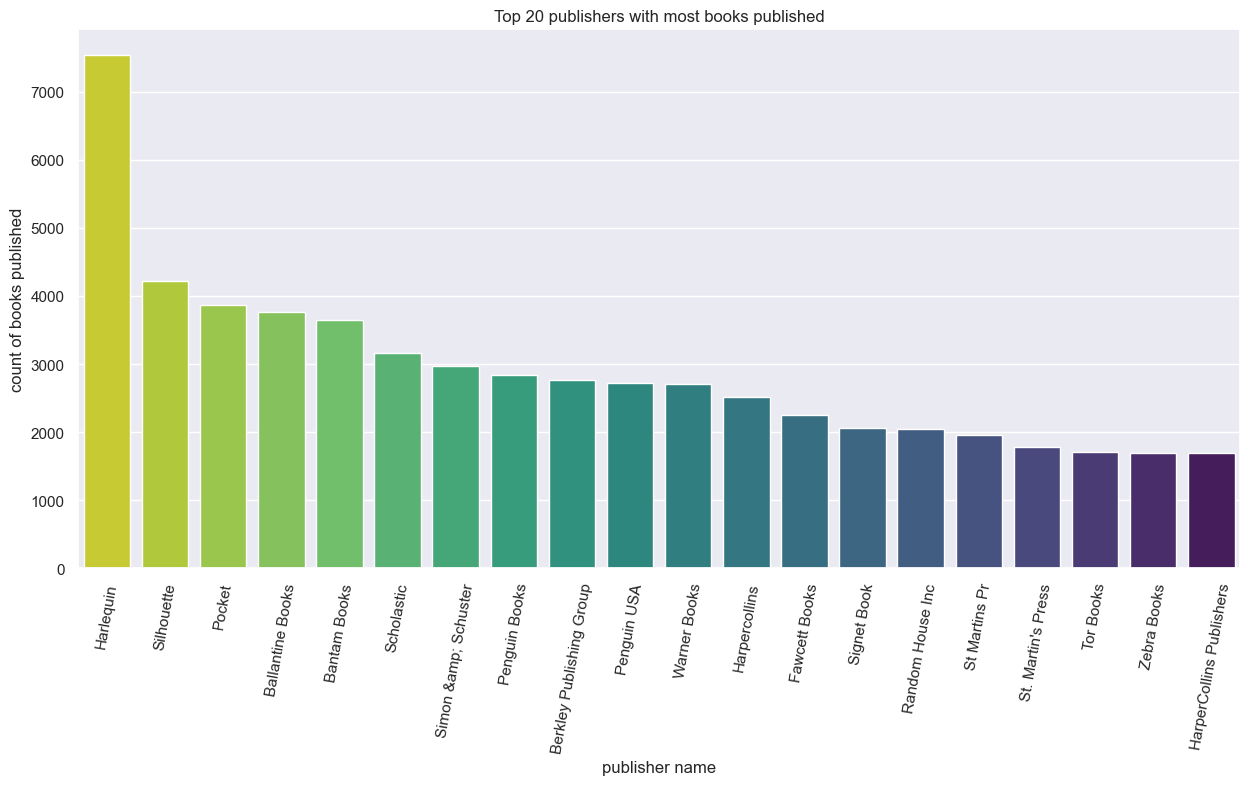

In [147]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

#### Harlequin can be seen as the publication house that has published the most number of books almost close to 7600 books, followed by Silhouette then Pocket and others in the sequence.

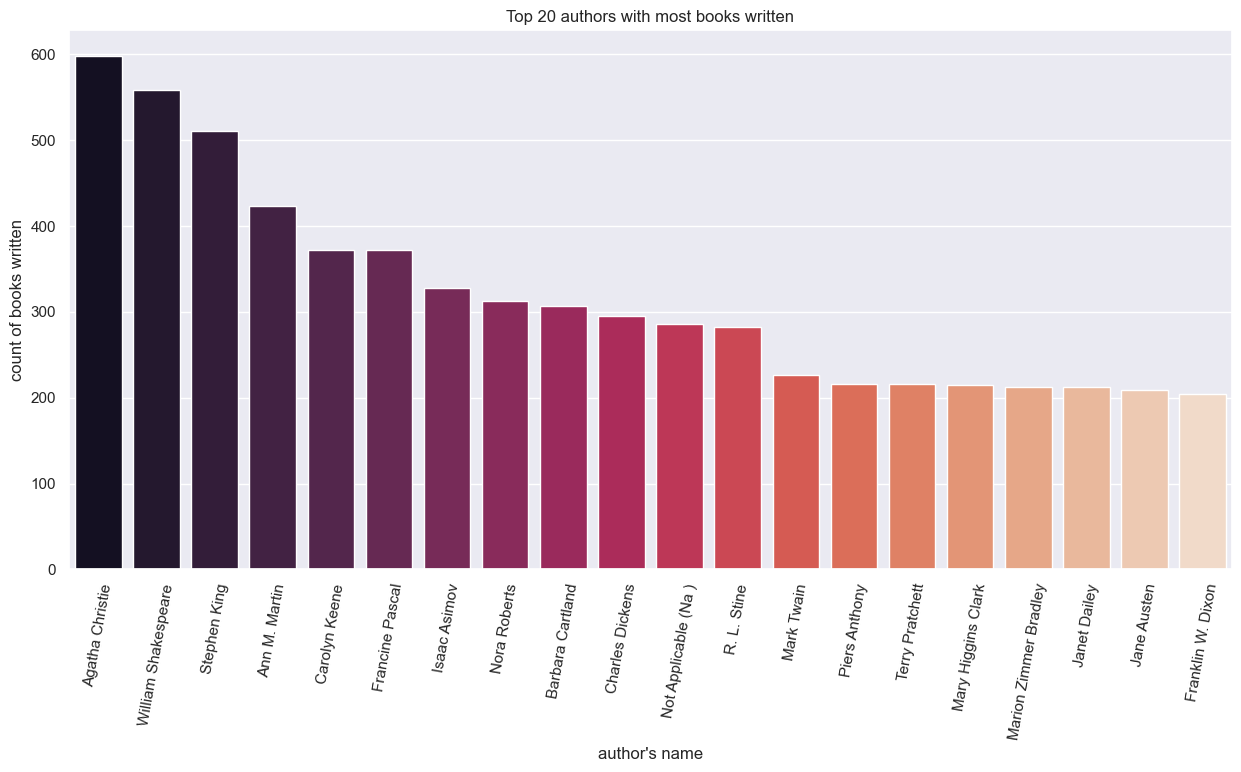

In [148]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['bookauthor'].value_counts()[:20].index,y = books['bookauthor'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

### Agatha Christie has authored the most books in our dataset with 600 books. William Shakespeare, Stephen Hawking and Ann M. Martin are also some of the authors who have written 400 - 500 books

### USERSDATA

In [149]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [150]:
dict = {'User-ID': 'userID',
        'Age':'age'}

users.rename(columns=dict,inplace=True)

In [151]:
users.head(1)

,userID,Location,age
0,1,"nyc, new york, usa",NaN


In [152]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [153]:
users.isna().sum()

userID           0
Location         0
age         110762
dtype: int64

In [154]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

#### As can we see from the values t people who are 0 years old and also we have people who are 244 years old which is for sure an error so we will keep the age group only from 5 years old to 85 years old and for the rest we will replace them with mean of the age.

In [155]:
#replacing the less than 5 and more than 85 values with mean of the age   
users.loc[(users['age'] < 5) | (users['age'] > 85),'age'] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)

print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [156]:
#converting the age to integer type 
users['age'] = users['age'].astype('int')
users['age']

0         34
1         18
2         34
3         17
4         34
          ..
278853    34
278854    50
278855    34
278856    34
278857    34
Name: age, Length: 278858, dtype: int32

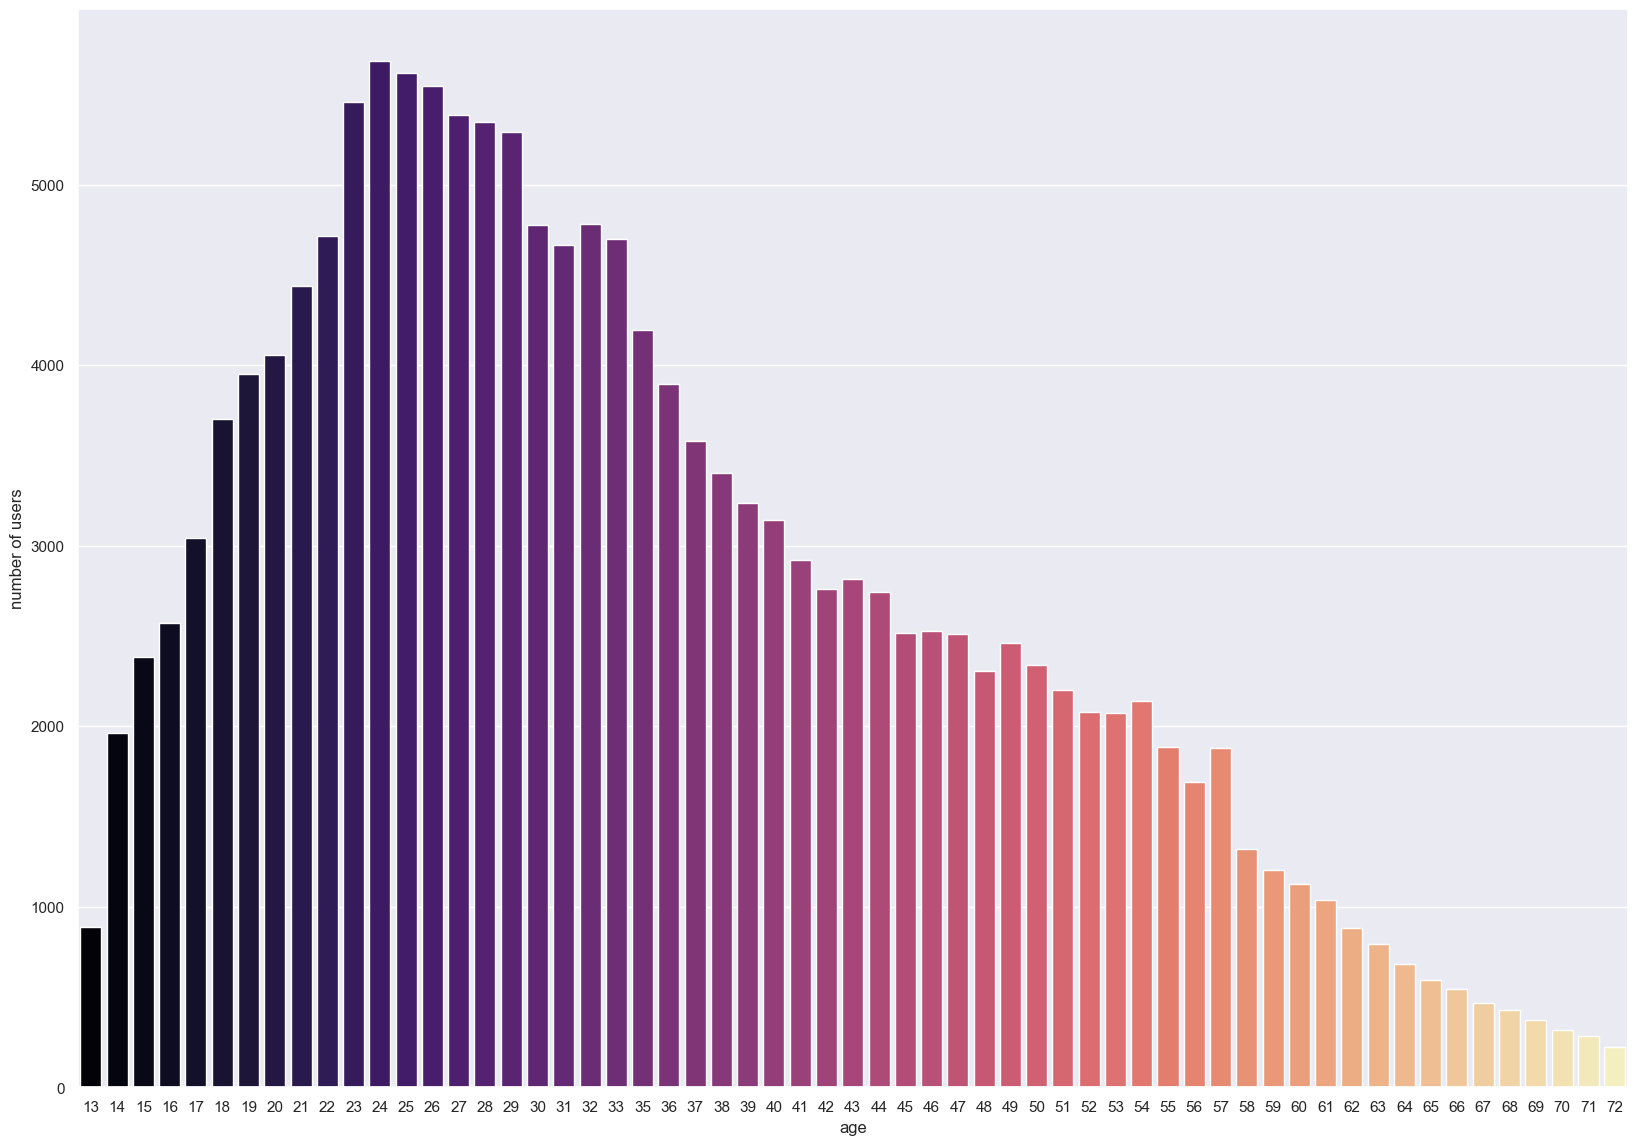

In [157]:
plt.subplots(figsize=(20,14))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['age'].value_counts()[1:60].index,y = users['age'].value_counts()[1:60].values,
            palette = 'magma').set(xlabel = "age",ylabel = 'number of users')
plt.show()

#### The most number of users in our dataset are from the age group 20 years to 40years old.

### RATINGS

In [158]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [159]:
dict = {'User-ID': 'userID',
        'Book-Rating':'book_rating'}

ratings.rename(columns=dict,inplace=True)

In [160]:
ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [161]:
ratings['book_rating'].unique()

array([ 0.,  5.,  3.,  6.,  8.,  7., 10.,  9.,  4.,  1.,  2., nan])

In [162]:
ratings['userID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: userID, Length: 105283, dtype: int64

In [163]:
ratings['userID'].unique().shape

(105283,)

In [164]:
x=ratings['userID'].value_counts()>200 #user return book
x[x].shape

(899,)

In [165]:
y=x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [166]:
ratings=ratings[ratings['userID'].isin(y)]# checks whether each element in a DataFrame is contained in a specified set of values.
ratings.head()    

,userID,ISBN,book_rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0


In [167]:
ratings.shape

(526356, 3)

In [168]:
ratings.head()

,userID,ISBN,book_rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0


10 rating extract

In [169]:
ratings_with_books=ratings.merge(books,on="ISBN")
ratings_with_books.head(2)

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [170]:
books.head()

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [171]:
ratings.head(2)

,userID,ISBN,book_rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0


In [172]:
ratings_with_books.head()

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [173]:
num_rating_df = ratings_with_books.groupby('title')['book_rating'].count().reset_index()
num_rating_df.head()

,title,book_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [174]:
final_rating=ratings_with_books.merge(num_rating_df,on='title')
final_rating.head()

,userID,ISBN,book_rating_x,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_rating_y
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
1,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
2,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
3,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
4,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160


In [175]:
final_rating.shape

(487800, 11)

In [176]:
final_rating=final_rating[final_rating['book_rating_y']>=50]
final_rating.head()

,userID,ISBN,book_rating_x,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_rating_y
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
1,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
2,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
3,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160
4,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,160


In [177]:
final_rating.sample(10)

,userID,ISBN,book_rating_x,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_rating_y
99452,88937,0446667900,8.0,A Darkness More Than Night,Michael Connelly,2002,Warner Vision,http://images.amazon.com/images/P/0446667900.0...,http://images.amazon.com/images/P/0446667900.0...,http://images.amazon.com/images/P/0446667900.0...,50
102317,115120,0385721420,0.0,Three Junes,JULIA GLASS,2003,Anchor,http://images.amazon.com/images/P/0385721420.0...,http://images.amazon.com/images/P/0385721420.0...,http://images.amazon.com/images/P/0385721420.0...,84
2302,59172,0316666343,0.0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,270
1871,206534,0316096199,0.0,Lucky : A Memoir,Alice Sebold,2002,Back Bay Books,http://images.amazon.com/images/P/0316096199.0...,http://images.amazon.com/images/P/0316096199.0...,http://images.amazon.com/images/P/0316096199.0...,115
42051,80683,0452264464,10.0,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,53
57149,216683,0451521560,1.0,Animal Farm,George Orwell,1986,New Amer Library Classics (Mm),http://images.amazon.com/images/P/0451521560.0...,http://images.amazon.com/images/P/0451521560.0...,http://images.amazon.com/images/P/0451521560.0...,70
31476,198711,0440213282,0.0,No Greater Love,Danielle Steel,1992,Dell,http://images.amazon.com/images/P/0440213282.0...,http://images.amazon.com/images/P/0440213282.0...,http://images.amazon.com/images/P/0440213282.0...,55
135941,225810,0425189864,0.0,Mortal Prey,John Sandford,2003,Berkley Publishing Group,http://images.amazon.com/images/P/0425189864.0...,http://images.amazon.com/images/P/0425189864.0...,http://images.amazon.com/images/P/0425189864.0...,62
70350,36609,0060987529,0.0,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books,http://images.amazon.com/images/P/0060987529.0...,http://images.amazon.com/images/P/0060987529.0...,http://images.amazon.com/images/P/0060987529.0...,90
43816,22625,0553279378,0.0,I Know Why the Caged Bird Sings,MAYA ANGELOU,1983,Bantam,http://images.amazon.com/images/P/0553279378.0...,http://images.amazon.com/images/P/0553279378.0...,http://images.amazon.com/images/P/0553279378.0...,82


In [178]:
final_rating.shape

(66020, 11)

In [179]:
final_rating.drop_duplicates(["userID","title"],inplace=True)
final_rating.shape

(60274, 11)

In [180]:
#pivot table it generates matrix
#final_rating.loc[0:4]
#final_rating.loc[:, 'userID':'bookauthor']
selected_columns = final_rating[['userID', 'title','bookauthor']]
selected_columns.head()

,userID,title,bookauthor
0,277427,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,3363,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,11676,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
6,12538,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
8,13552,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner


In [181]:


book_pivot=final_rating.pivot_table(columns='userID',index='title',values='book_rating_x')

In [182]:
book_pivot# nan 0 ratings from user

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [183]:
book_pivot.shape#760 book and 888 user

(760, 888)

In [184]:
book_pivot.fillna(0,inplace=True)
book_pivot.head()

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
from scipy.sparse import csr_matrix
#it ignore zero and it consider value only

In [186]:
book_sparse=csr_matrix(book_pivot)
book_sparse

<760x888 sparse matrix of type '<class 'numpy.float64'>'
	with 15011 stored elements in Compressed Sparse Row format>

In [187]:
from sklearn.neighbors import NearestNeighbors

In [188]:
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [189]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1),n_neighbors=6)
#algorithm can return both the distances to the nearest neighbors and their indices. 
 

In [190]:
suggestions

array([[237, 719, 351, 371, 602, 570]], dtype=int64)

In [191]:
distances# 6 books is recommending

array([[ 0.        , 48.03123983, 48.27007354, 48.67237409, 48.77499359,
        48.84669897]])

In [192]:
#let us print all the suggested books.

for i in range(len(suggestions)):
     print(book_pivot.index[suggestions[i]])


Index(['Hannibal', 'Vittorio the Vampire: New Tales of the Vampires',
       'Monster Blood (Goosebumps, No 3)',
       'Night Moves (Tom Clancy's Net Force, No. 3)',
       'The Killing Game: Only One Can Win...and the Loser Dies',
       'The First Wives Club Movie Tie In'],
      dtype='object', name='title')


In [193]:
book_pivot.index[3]

'4 Blondes'

In [194]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night', 'A Darkness More Than Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=760)

In [195]:
book_name=book_pivot.index

In [196]:
len(book_pivot.columns)

888

In [197]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
     

user_sim = 1 - pairwise_distances(book_pivot.values,metric='cosine')
     

user_sim
     

array([[1.        , 0.07763337, 0.        , ..., 0.09559382, 0.04562573,
        0.03347008],
       [0.07763337, 1.        , 0.27421749, ..., 0.07424784, 0.16365457,
        0.15050832],
       [0.        , 0.27421749, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.09559382, 0.07424784, 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04562573, 0.16365457, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03347008, 0.15050832, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [198]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

truncate = ratings_with_books.userID.unique()[:760]
   

#Set the index and column names to user ids 
user_sim_df.index = truncate
user_sim_df.columns = truncate
     

user_sim_df.iloc[0:5, 0:5]
     

,277427,3363,11676,12538,13552
277427,1.000000,0.077633,0.000000,0.0,0.036579
3363,0.077633,1.000000,0.274217,0.0,0.097921
11676,0.000000,0.274217,1.000000,0.0,0.062481
12538,0.000000,0.000000,0.000000,1.0,0.000000
13552,0.036579,0.097921,0.062481,0.0,1.000000


In [199]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,277427,3363,11676,12538,13552
277427,0.000000,0.077633,0.000000,0.0,0.036579
3363,0.077633,0.000000,0.274217,0.0,0.097921
11676,0.000000,0.274217,0.000000,0.0,0.062481
12538,0.000000,0.000000,0.000000,0.0,0.000000
13552,0.036579,0.097921,0.062481,0.0,0.000000


In [200]:
#5 Similar Users
user_sim_df.idxmax(axis=1)[0:5]

277427    190807
3363      173415
11676     135831
12538      28523
13552     187256
dtype: int64

In [ ]:
import pickle
pickle.dump(model,open('artifacts/model.pkl',"wb"))
pickle.dump(book_name,open('artifacts/book_name.pkl',"wb"))
pickle.dump(final_rating,open('artifacts/final_rating.pkl',"wb"))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl',"wb"))